#  Finding Heavy Traffic Indicators on I-94

We're going to analyze a dataset about the westbound traffic on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94).

`The goal of our analysis is to determine a few indicators of heavy traffic on I-94.` These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

## Table of Contents

> #### 1. Data Sources
> #### 2. Open the dataset
> #### 3. Analyzing Traffic Volume
> #### 4. Traffic Volume: Day vs. Night
> #### 5. Traffic Volume: Day vs. Night (II)
> #### 6. Time Indicators
> #### 7. Time Indicators (II)
> #### 8. Time Indicators (III)
> #### 9. Weather Indicators
> #### 10. Weather Types
> #### 11. Conclusion

---------------------


### Data Sources

`John Hogue` made the dataset available, and you can download it from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

### Read the dataset

* We will start by importing the libraires we will be using in this project. 
* We will then read the dataset and examin the first few rows and the last few rows.
* We will end this section by finding more info about the dataset.

In [1]:
# Import libraries needed for this project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
traffic_data = pd.read_csv("datasets/Metro_Interstate_Traffic_Volume.csv")

In [3]:
# examin the first 5 rows

traffic_data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
# examin the last five rows

traffic_data.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [5]:
# get more information about the dataset

traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


From the information above, we observe that the dataset is made up of `48204 rows` and `9 columns`
Also, we observe that there are no null values in our dataset. There are 3 data types in the dataset: `float64(3), int64(2), and object(4)`

**The columns information are;**

|Column|Description|
|:---|:---|
|holiday| Categorical US National holidays plus regional holiday, Minnesota State Fair|
|temp| Numeric Average temp in kelvin|
|rain_1h| Numeric Amount in mm of rain that occurred in the hour|
|snow_1h| Numeric Amount in mm of snow that occurred in the hour|
|clouds_all| Numeric Percentage of cloud cover|
|weather_main| Categorical Short textual description of the current weather|
|weather_description| Categorical Longer textual description of the current weather|
|date_time| DateTime Hour of the data collected in local CST time|
|traffic_volume| Numeric Hourly I-94 ATR 301 reported westbound traffic volume|

The [dataset documentation](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume) mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west).
This means that the `results of our analysis will be about the westbound traffic in the proximity of that station`. In other words, we should avoid generalizing our results for the entire I-94 highway.

------------

### Analyzing Traffic Volume

In this section, we're going to plot a histogram to visualize the distribution of the `traffic_volume` column. 

In [6]:
%matplotlib inline

Text(0.5, 0, 'Traffic Volume')

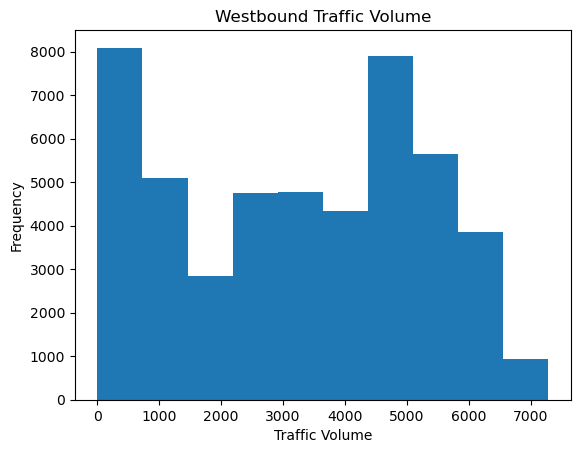

In [7]:
# plot histogram using pandas method
traffic_data["traffic_volume"].plot.hist()
plt.title("Westbound Traffic Volume")
plt.xlabel("Traffic Volume")

In [8]:
# look up a few statistics about the traffic_volume column.

traffic_data["traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

We observe that the the `minimum traffic volume is 0` and the `maximum traffic volume is 7280.`
About `25% of the time`, there were `1,193 cars or fewer` passing the station each hour — this probably occurs during the night, or when a road is under construction.
About `75% of the time`, the traffic volume was four times as much `(4,933 cars or more)`.

------

### Traffic Volume: Day vs. Night

The possibility that nighttime and daytime might influence traffic volume gives our analysis an interesting direction: comparing daytime with nighttime data.

In this section we'll start by dividing the dataset into two parts:

* Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
* Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

Notice that our `date_time` column is `object` type. We will start by converting the `date_time` column form `object` data type to `datetime`

In [9]:
# convert date_time column to datetime dtype
traffic_data["date_time"] = pd.to_datetime(traffic_data["date_time"])

# get the hour of every instance of the date_time column to a new column
traffic_data["hour"] = traffic_data["date_time"].dt.hour

In [10]:
traffic_data["hour"]

0         9
1        10
2        11
3        12
4        13
         ..
48199    19
48200    20
48201    21
48202    22
48203    23
Name: hour, Length: 48204, dtype: int64

In [11]:
# Isolate the daytime data and the nighttime data using boolean indexing

daytime_data = traffic_data[(traffic_data["hour"] >= 7) & (traffic_data["hour"] < 19)]
nighttime_data = traffic_data[(traffic_data["hour"] >=19) | (traffic_data["hour"] < 7)]

In [12]:
daytime_data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13


In [13]:
daytime_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23877 entries, 0 to 48198
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              23877 non-null  object        
 1   temp                 23877 non-null  float64       
 2   rain_1h              23877 non-null  float64       
 3   snow_1h              23877 non-null  float64       
 4   clouds_all           23877 non-null  int64         
 5   weather_main         23877 non-null  object        
 6   weather_description  23877 non-null  object        
 7   date_time            23877 non-null  datetime64[ns]
 8   traffic_volume       23877 non-null  int64         
 9   hour                 23877 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 2.0+ MB


In [14]:
nighttime_data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour
10,None,290.97,0.0,0.0,20,Clouds,few clouds,2012-10-02 19:00:00,3539,19
11,None,289.38,0.0,0.0,1,Clear,sky is clear,2012-10-02 20:00:00,2784,20
12,None,288.61,0.0,0.0,1,Clear,sky is clear,2012-10-02 21:00:00,2361,21
13,None,287.16,0.0,0.0,1,Clear,sky is clear,2012-10-02 22:00:00,1529,22
14,None,285.45,0.0,0.0,1,Clear,sky is clear,2012-10-02 23:00:00,963,23


In [15]:
nighttime_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24327 entries, 10 to 48203
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              24327 non-null  object        
 1   temp                 24327 non-null  float64       
 2   rain_1h              24327 non-null  float64       
 3   snow_1h              24327 non-null  float64       
 4   clouds_all           24327 non-null  int64         
 5   weather_main         24327 non-null  object        
 6   weather_description  24327 non-null  object        
 7   date_time            24327 non-null  datetime64[ns]
 8   traffic_volume       24327 non-null  int64         
 9   hour                 24327 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 2.0+ MB


Notice that we have succesfully isolated the `daytime data` and `nighttime data` based on the hours of the day.
* Daytime data: hours from 7 a.m. to 7 p.m. (12 hours) from 7 to 19 exclusive
* Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours) from 19 t0 7 exclusive

When we exam the information about the two datasets, we observe that more of the data was recorded during the `Nighttime with 24327 entries` against `23877 enries during the Daytime`

We will now proceed to the next section where we are going to compare the traffic volume at night and during day.

### Traffic Volume: Day vs. Night (II)

In this section, we are going to compare the traffic volume at night and during day.

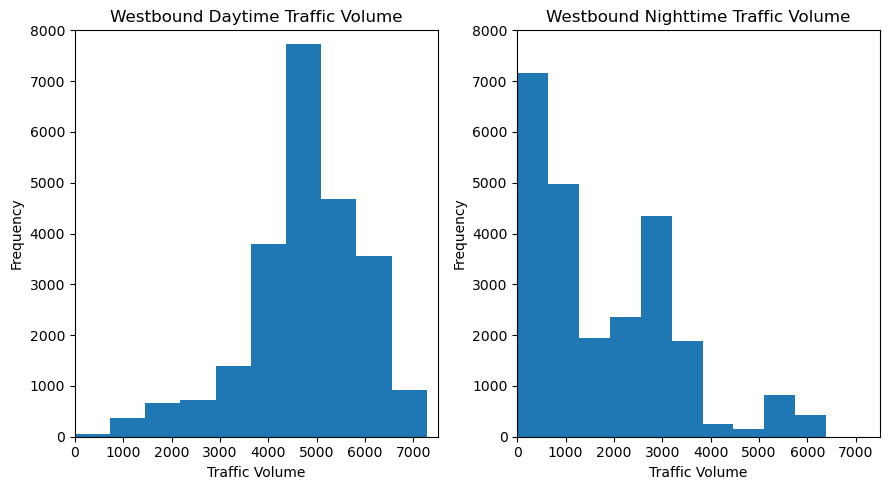

In [16]:
plt.figure(figsize=(9,5))

# histogram plot for traffic_volume column for daytime data
plt.subplot(1, 2,1)
daytime_data["traffic_volume"].plot.hist()
plt.title("Westbound Daytime Traffic Volume")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.xlim([0, 7500])
plt.ylim([0, 8000])
plt.tight_layout()

# histogram plot for traffic_volume column for nighttime data
plt.subplot(1, 2,2)
nighttime_data["traffic_volume"].plot.hist()
plt.title("Westbound Nighttime Traffic Volume")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.xlim([0, 7500])
plt.ylim([0, 8000])
plt.tight_layout()

In [17]:
# look up a few statistics for traffic_volume for both day time.
daytime_data["traffic_volume"].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [18]:
# look up a few statistics for traffic_volume for night time.
nighttime_data["traffic_volume"].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

After we plotted our histograms, we can make the following observations:
* The Daytime histogram plot for the traffic_volume resembles a `Normal distribution`. Here, about `25% of the time the traffic was 4252 cars or fewer` and about `75% of the time the traffic was 5559 cars or more`
* The Nighttime histogram plot for the traffic_volume resembles a `Right skewed distribution`. Here, about `25% of the time the traffic was 530 cars or fewer` and about `75% of the time the traffic was 2819 cars or more`

Looking at these two distribution, we notice that the traffic at night is light compared to during the day. 
* Since the traffic at night is light and our goal is to find the idicators of heavy traffic, we will focus on the `daytime data` which has more or heavy traffic recorded.

-----------

### Time Indicators

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:

* Month
* Day of the week
* Time of day

In [19]:
# create a copy of the daytime data to avoid SettingWithCopyWarning
day_data = daytime_data.copy()

# create a new column to hold the months
day_data['month'] = day_data['date_time'].dt.month

# Get aveage traffic volume by month
by_month = day_data.groupby('month').mean(numeric_only=True)
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

Text(0, 0.5, 'Average Traffic Volume')

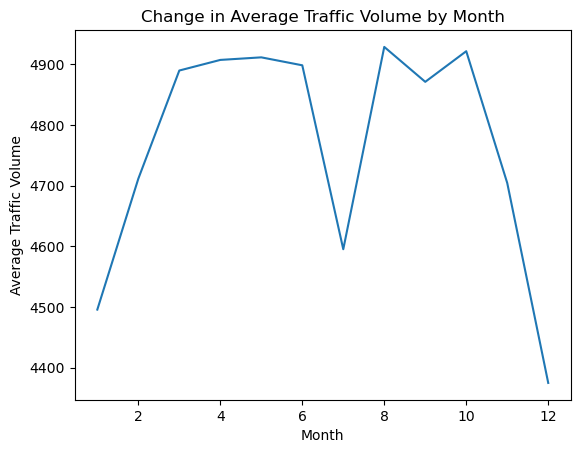

In [20]:
# Generate a line plot to visualize how the traffic volume changed each month on average.
plt.plot(by_month.index, by_month['traffic_volume'])
plt.title("Change in Average Traffic Volume by Month" )
plt.xlabel("Month")
plt.ylabel("Average Traffic Volume")

Looking at the plot, We observe that there was a steady and rapid increase in the average traffic volume from January to March. In the month of March to May the traffic was very high, though almost constant. However, there was a sharp drop in the avarage traffic starting from the month of June down to July and then a sharp increase again from July to August.
From October to December, the traffic volume keeps decreasing with December having the lowest traffic volume.

There is thus an exceptional drop in July and December

--------------

### Time Indicators (II)

In this section, we will continue with building line plots for another time unit: `day of the week`.

In [21]:
# create a new column to hold the day of the week
day_data['dayofweek'] = day_data['date_time'].dt.dayofweek

# Get aveage traffic volume by dayofweek
by_dayofweek = day_data.groupby('dayofweek').mean(numeric_only=True)
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

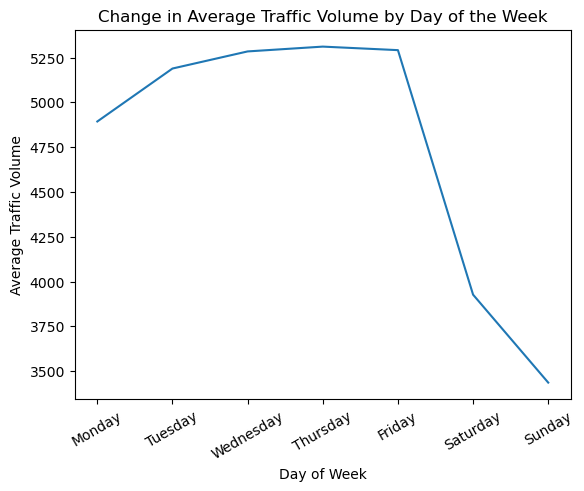

In [22]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Generate a line plot to visualize how the traffic volume changed each day of the week on average.
plt.plot(by_dayofweek.index, by_dayofweek['traffic_volume'])
plt.title("Change in Average Traffic Volume by Day of the Week" )
plt.xlabel("Day of Week")
plt.ylabel("Average Traffic Volume")
plt.xticks(ticks=[0,1,2,3,4,5,6], labels=days, rotation=30)
plt.show()

We can observe that there is very high traffic volume on working days which even increases on Tuesday and stays almost costant till Friday where it begins to drop rappidly such that by Sunday we observe a very low traffic volume compared to any other day.
This high traffic volume on working days is **probably caused by people rushing to work.**

-----------

### Time Indicators (III)

In the previous section, we found that the traffic volume is significantly heavier on business days compared to the weekends.

We will now generate a line plot for the time of day. The weekends, however, will drag down the average values, so we're going to look at the averages separately.

In [23]:
# split the data based on the day type: business day or weekend.
business_days = day_data.copy()[day_data["dayofweek"] <= 4] # 4 == Friday
weekend =  day_data.copy()[day_data["dayofweek"] >= 5] # 5 == Saturday

# Get aveages traffic volume by hours
by_hour_business = business_days.groupby("hour").mean(numeric_only=True)
by_hour_weekend = weekend.groupby("hour").mean(numeric_only=True)

print("Business days traffic volume by hour:\n", by_hour_business["traffic_volume"])
print("\nWeekend traffic volume by hour:\n", by_hour_weekend["traffic_volume"])

Business days traffic volume by hour:
 hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64

Weekend traffic volume by hour:
 hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


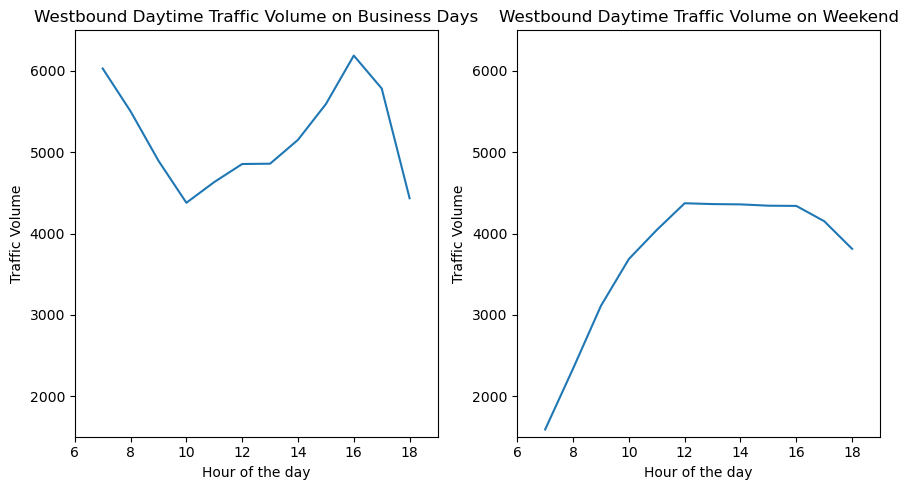

In [24]:
# Plot line plots on a grid chart 
plt.figure(figsize=(9,5))

# line plot to visualize how traffic volume changes by time of the day for business days.
plt.subplot(1, 2,1)
plt.plot(by_hour_business.index, by_hour_business["traffic_volume"])
plt.title("Westbound Daytime Traffic Volume on Business Days")
plt.xlabel("Hour of the day")
plt.ylabel("Traffic Volume")
plt.xlim([6, 19])
plt.ylim([1500, 6500])
plt.tight_layout()

# # line plot to visualize how traffic volume changes by time of the day for weekend.
plt.subplot(1, 2,2)
plt.plot(by_hour_weekend.index, by_hour_weekend["traffic_volume"])
plt.title("Westbound Daytime Traffic Volume on Weekend")
plt.xlabel("Hour of the day")
plt.ylabel("Traffic Volume")
plt.xlim([6, 19])
plt.ylim([1500, 6500])
plt.tight_layout()

The two plot above show very clear difference in traffic volume during business hours of working days and weekend. 
* On working days days, the traffic is very high in the early hours of the day when probalby people are rushing to working. we observe that there is a steady drop in the traffic volume between the hours of `7am (about 6030 cars) to 10am.` This is because many people has already gotten to their work place. However, the `traffic begins to rise again from the hour of 10am to 4pm where the traffic is highest (about 6189 cars)`. At 4pm, most people are already rushing back home from work, thus this is the cause of the high traffic at this hour of the day. The traffic volume begins to drop almost constantly after the 5pm. 
* Comparing the aveage traffic volume on working days to weekend, we observe a rather low traffic volume on weekend especially during the hour of `7am (about 1589 cars)`. This is about `4 times lesser than then traffic observe during this same hour on working days`. On Weekend, `the highest traffic is observe at noon( about 4372 cars)`. This is probably when people are going out for a walk.

----------------

To summarize all our findings regarding time indicator on heavy traffic;
* The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
* The traffic is usually heavier on business days compared to weekends.
* On business days, the rush hours are around 7 and 16.

---------------

### Weather Indicators
So far, we have focused on finding time indicators for heavy traffic.
`Another possible indicator of heavy traffic is weather`. The dataset provides us with a few useful columns about weather: `temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description`.

We will start by looking up the correlation values between some of these columns that are numeric with traffic_volume.

In [25]:
#  correlation values between traffic_volume and the numerical weather columns.
day_data.corr(numeric_only=True)["traffic_volume"][["temp", "rain_1h", "snow_1h", "clouds_all"]]

temp          0.128317
rain_1h       0.003697
snow_1h       0.001265
clouds_all   -0.032932
Name: traffic_volume, dtype: float64

Text(0, 0.5, 'Traffic Volume')

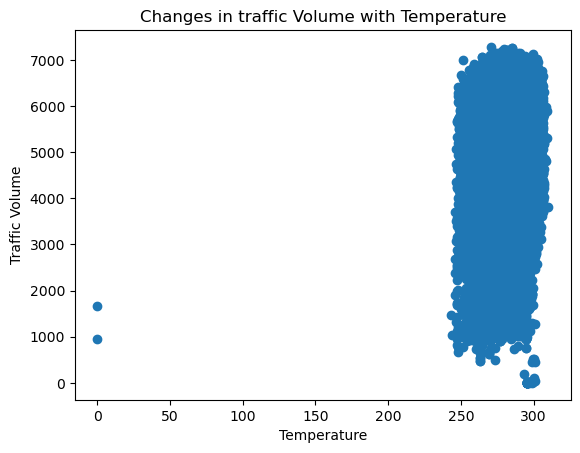

In [26]:
# Scatter plot for weather column with the strongest correlation with traffic_volume
plt.scatter(day_data["temp"], day_data["traffic_volume"])
plt.title("Changes in traffic Volume with Temperature")
plt.xlabel("Temperature")
plt.ylabel("Traffic Volume")

We observe that temperature has the hisghest correlation with traffic volume, and the traffic volume is generally recorded when the temperature is between 240 t0 310. However there are some spotted traffic volume recorded at a temperature of 0.

Even though we observe that there is genrally high traffic when the weather is warm compared to when it's very cold, we can however conclude that these weather columns are not reliable indicators for heavy traffic.

-----------

### Weather Types

In the previous section, we examined the correlation between traffic_volume and the numerical weather columns. However, we didn't find any reliable indicator of heavy traffic.

To see if we can find more useful data, we'll look next at the categorical weather-related columns: `weather_main and weather_description`.

We're going to calculate the average traffic volume associated with each unique value in these two columns.

In [27]:
by_weather_main = day_data.groupby('weather_main').mean(numeric_only=True)
by_weather_description = day_data.groupby('weather_description').mean(numeric_only=True)

print("Traffic volume by weather_main:\n", by_weather_main["traffic_volume"])
print("\nTraffic volume by weather_description:\n", by_weather_description["traffic_volume"])

Traffic volume by weather_main:
 weather_main
Clear           4778.416260
Clouds          4865.415996
Drizzle         4837.212911
Fog             4372.491713
Haze            4609.893285
Mist            4623.976475
Rain            4815.568462
Smoke           4564.583333
Snow            4396.321183
Squall          4211.000000
Thunderstorm    4648.212860
Name: traffic_volume, dtype: float64

Traffic volume by weather_description:
 weather_description
SQUALLS                                4211.000000
Sky is Clear                           4919.009390
broken clouds                          4824.130326
drizzle                                4737.330935
few clouds                             4839.818023
fog                                    4372.491713
freezing rain                          4314.000000
haze                                   4609.893285
heavy intensity drizzle                4738.586207
heavy intensity rain                   4610.356164
heavy snow                            

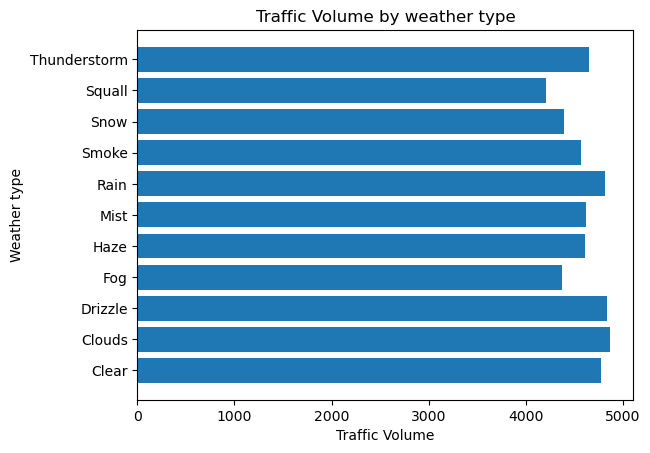

In [28]:
# horizontal bar plot for the traffic_volume column of by_weather_main.
plt.barh(by_weather_main.index, by_weather_main["traffic_volume"])
plt.title("Traffic Volume by weather type")
plt.xlabel("Traffic Volume")
plt.ylabel("Weather type")
plt.show()

We observe that the traffic volume for each of the weather type is over 4000 cars but however, there is no traffic volume exceeding 5000 cars. There is `no wether type that we can actually pin as a heavy traffic indicator`

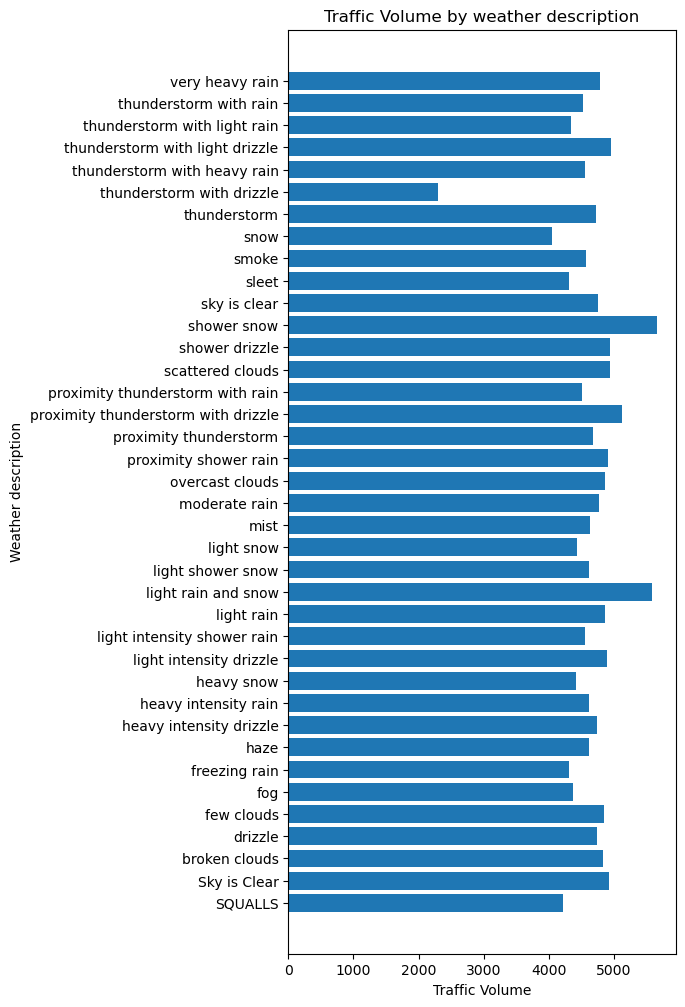

In [29]:
# horizontal bar plot for the traffic_volume column of by_weather_description.
plt.figure(figsize=(5,12))
plt.barh(by_weather_description.index, by_weather_description["traffic_volume"])
plt.title("Traffic Volume by weather description")
plt.xlabel("Traffic Volume")
plt.ylabel("Weather description")
plt.show()

We observe that the most of the weather descriptions have a traffic volume of over 4000 cars. However the traffic `exceeds 5000 cars` during `proximity thunderstorm with drizzle`, `light rain and snow` and `shower snow`

### Conclusion
We conclude our findings,
* The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
* The traffic is usually heavier on business days compared to weekends.
* On business days, the rush hours are around 7 and 16.
* Traffic is usually heavier during `light rain and snow` and `shower snow`